# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# The Goal

The primary objective of this project is to help the used car dealership price their inventory more accurately by identifying the factors that significantly influence the price of used cars. The goal is to enable the dealership to:

1. Maximize profit margins by pricing vehicles competitively but optimally.
2. Move inventory faster by understanding which cars are priced in line with customer preferences.
3. Highlight desirable features in their marketing to attract potential buyers based on what consumers value most in a used car.

# Key Business Questions

1. Which factors have the strongest influence on car prices?
This involves analyzing features such as the car’s brand, model, year of production, mileage, engine size, fuel type, and condition.
The dealership is interested in knowing if certain brands or models hold their value better and if certain features (e.g., low mileage, safety features) significantly boost car prices.
2.	How do market trends affect car prices over time?
By analyzing historical data, the dealership wants to identify trends in used car prices. For example, are there seasonal variations in car prices (e.g., higher prices in summer)?
Additionally, understanding whether newer models or technological advancements (e.g., hybrid/electric vehicles) are affecting used car prices is key.

# Data Mining Goals

- Develop predictive models that can accurately estimate the price of a car given its features.
- Regression models (linear regression, random forests, etc.) can be used to predict the price based on factors like mileage, year, and brand.
- Clustering or segmentation techniques can identify groups of similar cars that have similar price trends.
- Understand feature importance in relation to car prices.
- Feature importance ranking (from models like decision trees or XGBoost) will highlight the factors that most affect pricing, which can be used to guide business decisions.
- Analyze customer preferences to identify what car buyers prioritize.
- This analysis could reveal whether customers are more willing to pay for certain features (e.g., automatic transmission, luxury interiors) or brands (e.g., luxury vs economy).

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
from IPython.utils import io

# modeling
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing data
df_vehicles = pd.read_csv('./data/vehicles.csv')

In [3]:
print("\nPreview of the Data\n")
print("First 5 Rows:")
display(df_vehicles.head())

print("\nLast 5 Rows:")
display(df_vehicles.tail())

print("\nRandom Sample of 5 Rows:")
display(df_vehicles.sample(5))

print("\nData Types and Non-null Counts\n")
display(df_vehicles.info())


Preview of the Data

First 5 Rows:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc



Last 5 Rows:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy
426879,7301591129,wyoming,30590,2019.0,bmw,4 series 430i gran coupe,good,NaN,gas,22716.0,clean,other,WBA4J1C58KBM14708,rwd,NaN,coupe,NaN,wy



Random Sample of 5 Rows:


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
421983,7302100851,madison,14300,2016.0,chevrolet,malibu,excellent,4 cylinders,gas,72000.0,lien,automatic,NaN,fwd,mid-size,sedan,black,wi
48371,7301955451,redding,25990,2016.0,bmw,3 series 340i sedan 4d,good,NaN,gas,41785.0,clean,automatic,WBA8B3G56GNT92556,rwd,NaN,sedan,black,ca
65671,7308723788,stockton,6950,2008.0,lexus,es 350 sedan 6-speed automatic,NaN,NaN,gas,176000.0,clean,automatic,JTHBJ46G282200989,fwd,NaN,sedan,silver,ca
245716,7307726533,lincoln,55999,2017.0,cadillac,escalade,NaN,8 cylinders,gas,28090.0,clean,automatic,1GYS4BKJ5HR390545,4wd,NaN,SUV,black,ne
122976,7315262114,atlanta,6400,2007.0,honda,civic ex,like new,4 cylinders,gas,118000.0,clean,automatic,NaN,fwd,NaN,coupe,NaN,ga



Data Types and Non-null Counts

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         4

None

In [4]:
print("\nDescriptive Statistics of Numerical Features:")
display(df_vehicles.describe())

print("\nNumber of Unique Values in Each Column:")
display(df_vehicles.nunique())


Descriptive Statistics of Numerical Features:


,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07



Number of Unique Values in Each Column:


id              426880
region             404
price            15655
year               114
manufacturer        42
model            29649
condition            6
cylinders            8
fuel                 5
odometer        104870
title_status         6
transmission         3
VIN             118246
drive                3
size                 4
type                13
paint_color         12
state               51
dtype: int64

In [5]:
print("\nMissing Values in Each Column:")
display(df_vehicles.isnull().sum())


Missing Values in Each Column:


id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [6]:
# drop irrelevant columns: 'id' and 'VIN'
df_vehicles_cleaned = df_vehicles.drop(columns=['id', 'VIN'])

# replacing missing values based on data type:
# for string/object columns, replace the missing values with 'unknown' and
# for float columns, replace missing values with np.nan
df_vehicles_cleaned_filled = df_vehicles_cleaned.copy(deep=True)

In [7]:
df_vehicles_cleaned_filled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   price         426880 non-null  int64  
 2   year          425675 non-null  float64
 3   manufacturer  409234 non-null  object 
 4   model         421603 non-null  object 
 5   condition     252776 non-null  object 
 6   cylinders     249202 non-null  object 
 7   fuel          423867 non-null  object 
 8   odometer      422480 non-null  float64
 9   title_status  418638 non-null  object 
 10  transmission  424324 non-null  object 
 11  drive         296313 non-null  object 
 12  size          120519 non-null  object 
 13  type          334022 non-null  object 
 14  paint_color   296677 non-null  object 
 15  state         426880 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 52.1+ MB


In [8]:
# display the count of the missing values before cleaning the dataset
print(f"Total missing values before being replaced:\n{df_vehicles_cleaned_filled.isnull().sum()}\n")

for column in df_vehicles_cleaned_filled.columns:
    data_type = df_vehicles_cleaned_filled[column].dtype
    print(f"Handling column: {column} of data type: {data_type}")
    if data_type == 'object':
        df_vehicles_cleaned_filled[column] = df_vehicles_cleaned_filled[column].fillna('unknown')
    elif (data_type == 'float64' or data_type == 'int64'):
        df_vehicles_cleaned_filled[column] = df_vehicles_cleaned_filled[column].fillna(np.nan)
    else:
        pass
    print(f"Handled column: {column}")

# verifying the updated DataFrame to confirm replacements
missing_values_after_fill = df_vehicles_cleaned_filled.isnull().sum()

Total missing values before being replaced:
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

Handling column: region of data type: object
Handled column: region
Handling column: price of data type: int64
Handled column: price
Handling column: year of data type: float64
Handled column: year
Handling column: manufacturer of data type: object
Handled column: manufacturer
Handling column: model of data type: object
Handled column: model
Handling column: condition of data type: object
Handled column: condition
Handling column: cylinders of data type: object
Handled column: cylinders
Handling column: fuel of data type: object
Handled column: fuel
Handling column: o

In [9]:
# display the count of missing values post cleaning
print(f"Total missing values after being replaced:\n{missing_values_after_fill.isnull().sum()}\n")

Total missing values after being replaced:
0



In [10]:
# setting the dataframe to move forward
df_vehicles = df_vehicles_cleaned_filled.copy(deep=True)


Histograms for Numerical Features

 'price' column cleaned. Entries greater than 68747.47999999992 were removed.
 'odometer' column cleaned. Entries greater than 280000.0 were removed.


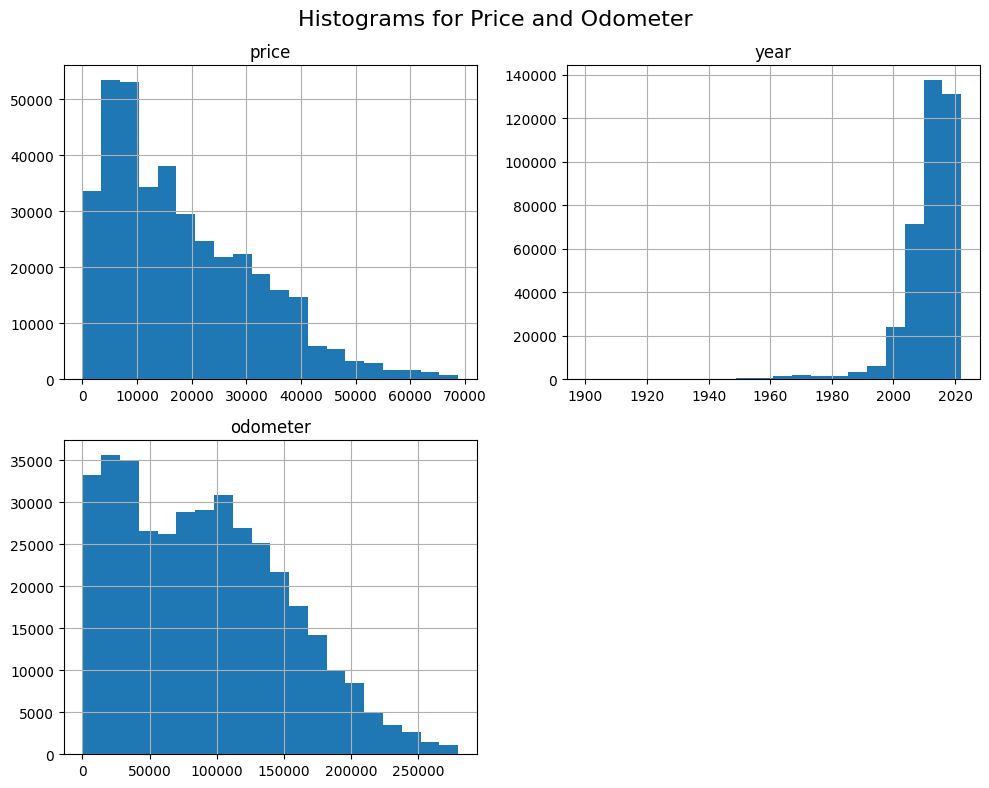

In [11]:
print("\nHistograms for Numerical Features\n")

if 'id' in df_vehicles.columns:
    df_vehicles = df_vehicles.drop(columns=['id'])
    print(" 'id' column removed.")

df_vehicles = df_vehicles[df_vehicles['price'] > 0]
price_upper_limit = df_vehicles['price'].quantile(0.99)
df_vehicles = df_vehicles[df_vehicles['price'] <= price_upper_limit]
print(f" 'price' column cleaned. Entries greater than {price_upper_limit} were removed.")

df_vehicles = df_vehicles[df_vehicles['odometer'] > 0]
odometer_upper_limit = df_vehicles['odometer'].quantile(0.99)
df_vehicles = df_vehicles[df_vehicles['odometer'] <= odometer_upper_limit]
print(f" 'odometer' column cleaned. Entries greater than {odometer_upper_limit} were removed.")

df_vehicles.hist(figsize=(10, 8), bins=20)
plt.suptitle('Histograms for Price and Odometer', fontsize=16)
plt.tight_layout()
plt.show()


KDE plots for numerical features



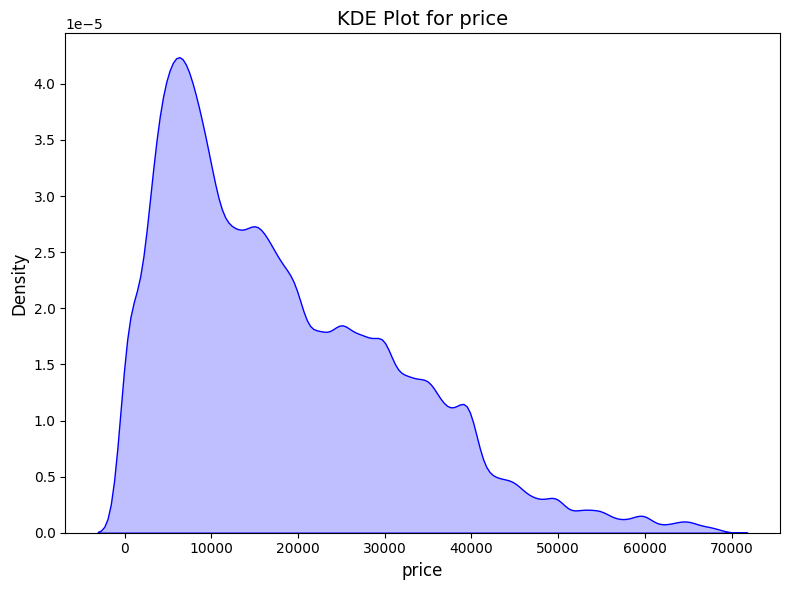

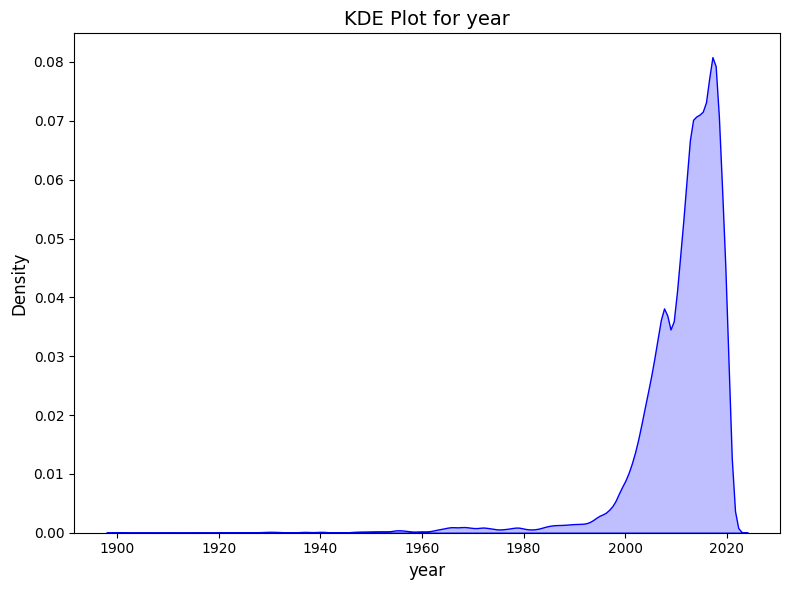

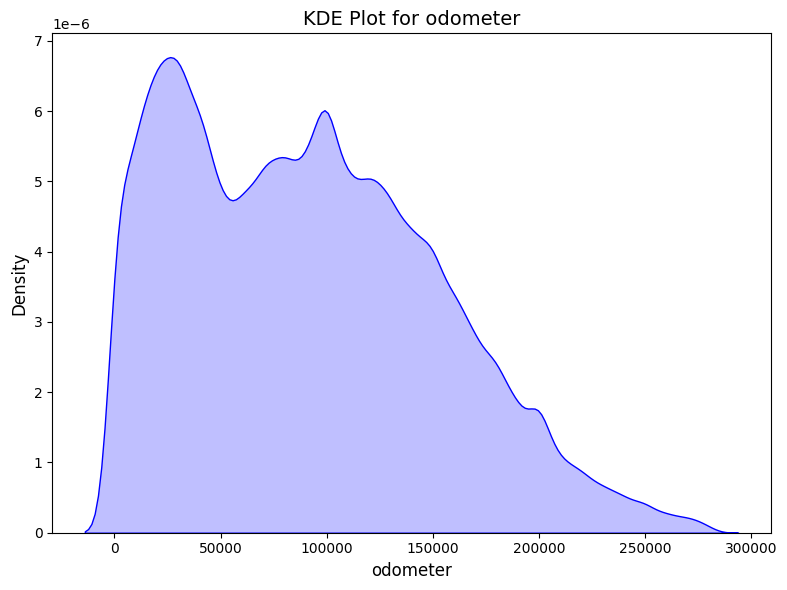

In [12]:
print("\nKDE plots for numerical features\n")
numerical_columns = df_vehicles.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df_vehicles[col], fill=True, color='blue')
    plt.title(f'KDE Plot for {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.tight_layout()
    plt.show()

Following the histograms, the KDE plots show:

1. Price: Most vehicles are priced between 5,000 and 25,000 units, with a peak near 10,000. Higher prices (up to 70,000) are less common.
2. Year: The majority of vehicles are from the 2000s onward, with very few before 1970.
3. Odometer: Most vehicles have odometer readings between 0 and 150,000, with peaks around 50,000 and 100,000, though a few reach up to 300,000.

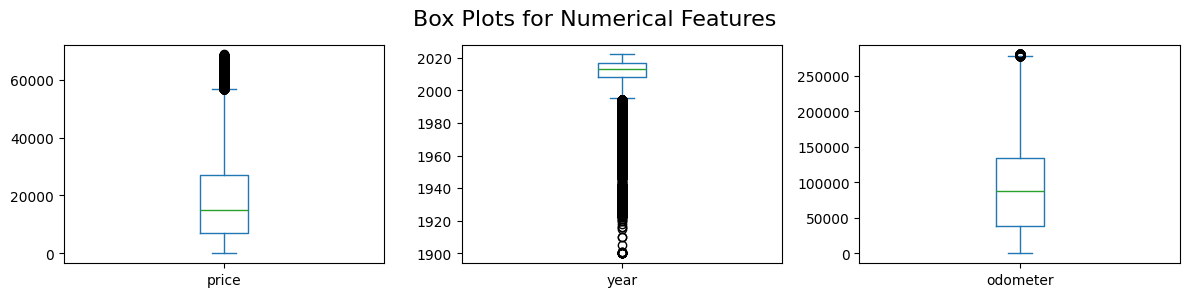

In [13]:
# explore outliers by checking visuals from the box plots 
numerical_columns = df_vehicles.select_dtypes(include=['float64', 'int64']).columns

df_vehicles[numerical_columns].plot(kind='box', subplots=True, layout=(3, 3), figsize=(12, 8), sharex=False, sharey=False)
plt.suptitle('Box Plots for Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

- For the year, the box plots show outliers due to the fact that majority of the vehicles were made post 2000

In [14]:
# explore outliers by checking if the z-scores are out of bounds
z_scores = stats.zscore(df_vehicles[numerical_columns])

z_scores_df = pd.DataFrame(z_scores, columns=numerical_columns)

outliers = (z_scores_df > 3) | (z_scores_df < -3)
print(f"\nOutliers detected:\n{outliers.sum()}")


Outliers detected:
price       3645
year           0
odometer     449
dtype: int64


- We will not cap or remove this data as it is a genuine representation of the real-world scenario:
    - This will preserve data integrity, as genuine outliers may contain valuable information or represent meaningful variations, so capping/excluding outliers could lead to a loss of important insights.
    - It will prevent bias introduction, as artificially limiting extreme values can distort the natural distribution and relationships in the data.
    - It will lead to more robust models, as certain models (e.g., decision trees, random forests) are inherently robust to outliers, so capping/excluding outliers may not improve performance and could even be counterproductive.

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

## Rationale Behind Feature Selection

- ANOVA (Analysis of Variance) compares means across groups defined by categorical variables to determine if differences are statistically significant. It’s useful for:
    - Comparing Group Means: Tests whether the means of a continuous variable differ across categories (e.g., treatment types or regions).
    - Handling Multiple Groups: Allows comparison of more than two categories simultaneously.
    - Assessing Variance: Determines if observed group differences are likely due to more than random variation.
    - ANOVA helps assess the impact of categorical variables on a continuous outcome effectively.

In [15]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

categorical_columns = df_vehicles.select_dtypes(include=['object']).columns

low_cardinality_cols = [col for col in categorical_columns if df_vehicles[col].nunique() < 20]

X_categorical_encoded = df_vehicles[low_cardinality_cols].apply(lambda x: label_encoder.fit_transform(x))
y_price = df_vehicles['price']

f_stat, p_values = f_classif(X_categorical_encoded, y_price)

anova_results = pd.DataFrame({
    'Feature': low_cardinality_cols,
    'F-Statistic': f_stat,
    'p-Value': p_values
}).sort_values(by='F-Statistic', ascending=False)

anova_results

,Feature,F-Statistic,p-Value
4,transmission,37.057269,0.0
0,condition,7.490637,0.0
2,fuel,6.728992,0.0
3,title_status,6.132917,0.0
1,cylinders,6.057182,0.0
6,size,5.806395,0.0
5,drive,4.668367,0.0
7,type,3.442677,0.0
8,paint_color,2.737781,0.0


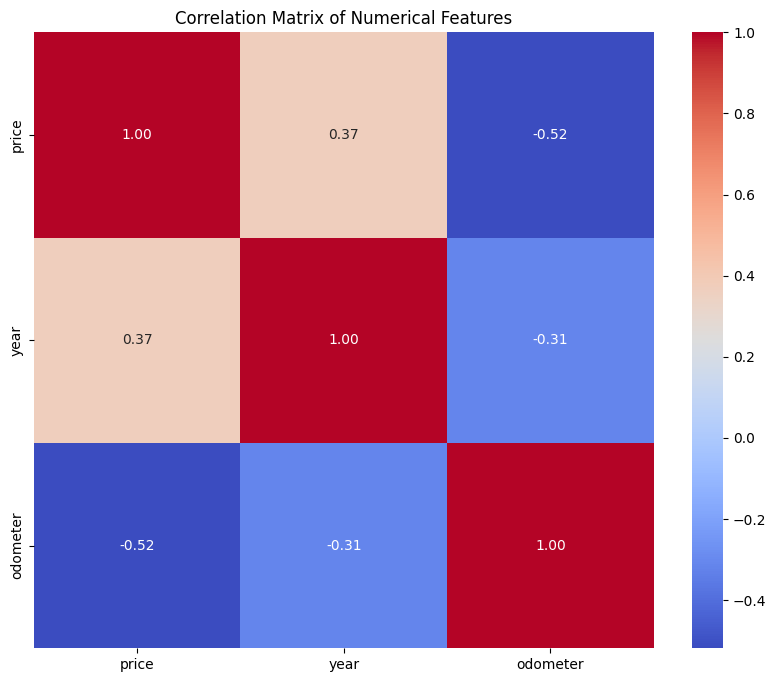

In [16]:
# checking the correlationship between numerical features from the cleaned dataset
numerical_features = df_vehicles.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()

# plotting the heatmap to visualize correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

- Price vs Year: Positive correlation (0.37) indicates that newer vehicles tend to be more expensive.
- Price vs Odometer: Negative correlation (-0.52) suggests that vehicles with higher mileage are generally cheaper.
- Year vs Odometer: Negative correlation (-0.31) shows that newer cars typically have lower odometer readings.

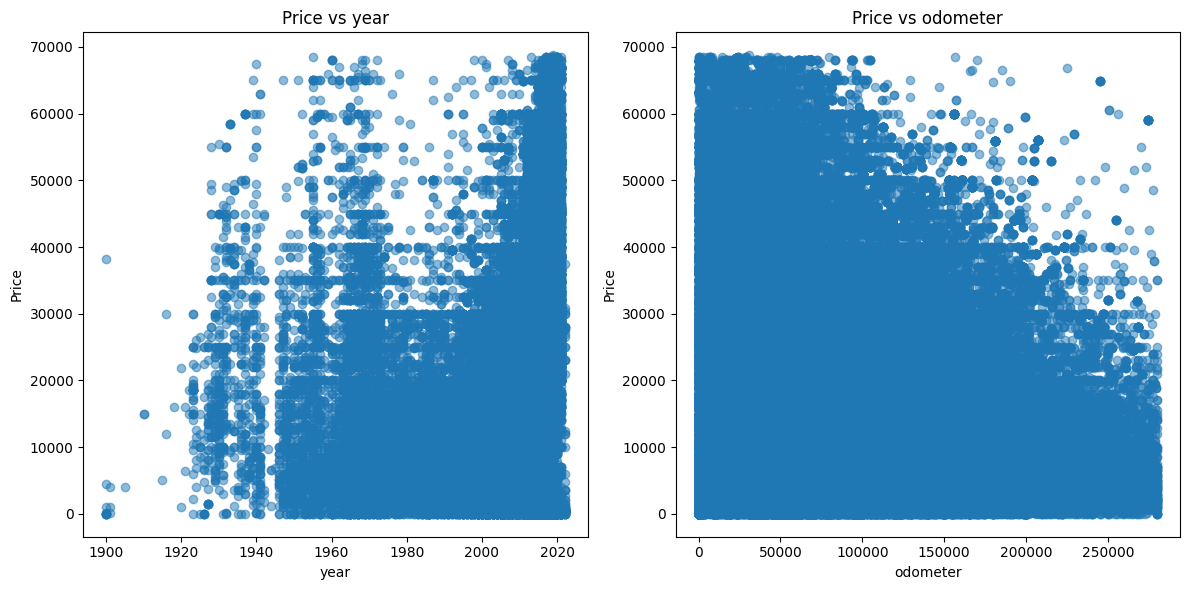

In [17]:
# plotting the correlation for price vs. year and odometer
numerical_columns = ['year', 'odometer']
plt.figure(figsize=(12, 6))

for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, len(numerical_columns), i)
    plt.scatter(numerical_features[column], numerical_features['price'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Price')
    plt.title(f'Price vs {column}')

plt.tight_layout()
plt.show()

The plots show:
- Price vs Year: Newer cars (post-2000) are generally more expensive, with older cars showing more price variation.
- Price vs Odometer: Higher mileage generally leads to lower prices, with a few outliers.

#### Rationale for Feature Selection:

Selected Features:
- Transmission: Transmission type (manual or automatic) has the strongest influence on car price among categorical features, with automatic transmissions often being more expensive. This was confirmed by the ANOVA analysis, which showed the highest F-statistic for this feature.
- Condition: The car's condition (e.g., new, good, fair) significantly affects its price, as better condition vehicles command higher prices. The ANOVA results indicated a strong influence of condition on pricing.
- Fuel Type: The type of fuel (e.g., gasoline, diesel, electric) plays an important role in pricing, especially as electric vehicles are becoming more desirable. This feature had a notable F-statistic, highlighting its impact on car price.
- Title Status: The title status (e.g., clean, rebuilt) impacts price, with clean titles generally commanding higher prices. The ANOVA analysis confirmed its significance in predicting car price.
- Cylinders: The number of cylinders correlates with car price, as more cylinders often indicate better performance and higher value. The ANOVA results showed that this feature has a meaningful impact on pricing.
- Drive: Drive type (e.g., 4wd, rwd, fwd) influences price, with 4wd cars generally priced higher due to better traction and performance. The ANOVA analysis indicated its importance among categorical features.
- Type: The type of vehicle (e.g., SUV, truck) affects pricing, with larger vehicles like SUVs and trucks often having higher resale values. This feature was found to be significant in the ANOVA analysis.
- Paint Color: Although less influential compared to other features, paint color can still have some effect on pricing, particularly for custom or rare colors. The ANOVA results showed a lower but still notable F-statistic for this feature.
- Year: The age of the car is one of the most important factors influencing price. Typically, newer cars have higher resale values.
- Odometer: The mileage on the car (how much it has been driven) is another critical factor. Cars with higher mileage usually have lower prices due to wear and tear.

#### Why Not Other Features?
- Manufacturer and Model: These features, while often considered key indicators of value, did not show significant statistical influence in this dataset and were thus deprioritized.
- Size: This feature may overlap with the vehicle type and was found to be less impactful compared to other selected features.
- State (region): Geographic location could have some influence on price, but it adds complexity without substantial impact compared to the core features selected.
- VIN (Vehicle Identification Number): The VIN is a unique identifier and has no direct influence on price, making it irrelevant for predictive modeling.

In [18]:
target = 'price'
features = ['transmission', 'condition', 'fuel', 'title_status', 'cylinders', 'drive', 'type', 'paint_color', 'year', 'odometer']

X = df_vehicles[features]
y = df_vehicles[target]

# create separate categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

In [19]:
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

X_preprocessed = preprocessor.fit_transform(X)

In [20]:
# splitting the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

In [21]:
# Show the resulting shapes of the train and test sets
print(f"Training Features Shape: {X_train.shape}")
print(f"Test Features Shape: {X_test.shape}")
print(f"Training Target Shape: {y_train.shape}")
print(f"Test Target Shape: {y_test.shape}")

Training Features Shape: (306271, 66)
Test Features Shape: (76568, 66)
Training Target Shape: (306271,)
Test Target Shape: (76568,)


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [22]:
# initializing models and their parameter grids for GridSearchCV
models_with_params = {
    'Linear Regression': (Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', LinearRegression())
    ]), {
        'regressor__fit_intercept': [True, False]
    }),
    'Ridge Regression': (Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', Ridge())
    ]), {
        'regressor__alpha': [0.1, 1.0, 10.0]
    }),
    'Random Forest': (Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1))
    ]), {
        'regressor__n_estimators': [10, 50],
        'regressor__max_depth': [3, 5],
        'regressor__min_samples_split': [10],
        'regressor__min_samples_leaf': [5, 10],
        'regressor__max_features': ['sqrt']
    }),
    'XGBoost': (Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', XGBRegressor(random_state=42, eval_metric='rmse', n_jobs=-1))
    ]), {
        'regressor__n_estimators': [10, 50],
        'regressor__max_depth': [3, 5],
        'regressor__learning_rate': [0.1]
    }),
    'LightGBM': (Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('regressor', LGBMRegressor(random_state=42, n_jobs=-1, verbose=-1))
    ]), {
        'regressor__n_estimators': [10, 50],
        'regressor__max_depth': [3, 5],
        'regressor__learning_rate': [0.1]
    })
}

# function to evaluate models using cross-validation
def evaluate_models(X_train, y_train, models, cv=3):
    results = []

    for name, (model, params) in models.items():
        
        grid_search = GridSearchCV(model, param_grid=params, cv=cv, scoring='neg_mean_squared_error', n_jobs=-1, verbose=0)
        grid_search.fit(X_train, y_train)
        
        best_estimator = grid_search.best_estimator_
        
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        y_train_pred = best_estimator.predict(X_train)
        
        mse = mean_squared_error(y_train, y_train_pred)
        r2 = r2_score(y_train, y_train_pred)
        mae = mean_absolute_error(y_train, y_train_pred)
        
        results.append({
            'Model': name,
            'Best Params': best_params,
            'Best CV Score (Neg MSE)': best_score,
            'MSE': mse,
            'R^2': r2,
            'MAE': mae
        })
    
    return pd.DataFrame(results)

grid_search_results_df = evaluate_models(X_train, y_train, models_with_params)

In [23]:
# converting the negative MSE from CV to positive for interpretability
grid_search_results_df['Best CV Score (MSE)'] = -grid_search_results_df['Best CV Score (Neg MSE)']

In [24]:
# properly displaying the results
display(grid_search_results_df[['Model', 'Best Params', 'Best CV Score (MSE)', 'MSE', 'R^2', 'MAE']])

,Model,Best Params,Best CV Score (MSE),MSE,R^2,MAE
0,Linear Regression,{'regressor__fit_intercept': False},8.001000e+07,7.997640e+07,0.561021,6379.987517
1,Ridge Regression,{'regressor__alpha': 0.1},8.001009e+07,7.997651e+07,0.561021,6379.879811
2,Random Forest,"{'regressor__max_depth': 5, 'regressor__max_fe...",8.614629e+07,8.617571e+07,0.526994,6912.074811
3,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",5.481834e+07,5.462359e+07,0.700179,4914.148220
4,LightGBM,"{'regressor__learning_rate': 0.1, 'regressor__...",5.496343e+07,5.465112e+07,0.700028,4921.816496


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [25]:
# sorting the results based on 'Best CV Score (MSE)' in ascending order (lower is better)
sorted_grid_search_results_df = grid_search_results_df.sort_values(by='Best CV Score (MSE)', ascending=True)

# properly displaying the sorted results
display(sorted_grid_search_results_df[['Model', 'Best Params', 'Best CV Score (MSE)', 'MSE', 'R^2', 'MAE']])

,Model,Best Params,Best CV Score (MSE),MSE,R^2,MAE
3,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",5.481834e+07,5.462359e+07,0.700179,4914.148220
4,LightGBM,"{'regressor__learning_rate': 0.1, 'regressor__...",5.496343e+07,5.465112e+07,0.700028,4921.816496
0,Linear Regression,{'regressor__fit_intercept': False},8.001000e+07,7.997640e+07,0.561021,6379.987517
1,Ridge Regression,{'regressor__alpha': 0.1},8.001009e+07,7.997651e+07,0.561021,6379.879811
2,Random Forest,"{'regressor__max_depth': 5, 'regressor__max_fe...",8.614629e+07,8.617571e+07,0.526994,6912.074811


In [26]:
# sorting based on R² (higher is better)
sorted_grid_search_results_df = grid_search_results_df.sort_values(by='R^2', ascending=False)

# properly displaying the sorted results
display(sorted_grid_search_results_df[['Model', 'Best Params', 'Best CV Score (MSE)', 'MSE', 'R^2', 'MAE']])

,Model,Best Params,Best CV Score (MSE),MSE,R^2,MAE
3,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",5.481834e+07,5.462359e+07,0.700179,4914.148220
4,LightGBM,"{'regressor__learning_rate': 0.1, 'regressor__...",5.496343e+07,5.465112e+07,0.700028,4921.816496
0,Linear Regression,{'regressor__fit_intercept': False},8.001000e+07,7.997640e+07,0.561021,6379.987517
1,Ridge Regression,{'regressor__alpha': 0.1},8.001009e+07,7.997651e+07,0.561021,6379.879811
2,Random Forest,"{'regressor__max_depth': 5, 'regressor__max_fe...",8.614629e+07,8.617571e+07,0.526994,6912.074811


In [27]:
# sorting based on MAE (lower is better)
sorted_grid_search_results_df = grid_search_results_df.sort_values(by='MAE', ascending=True)

# properly displaying the sorted results
display(sorted_grid_search_results_df[['Model', 'Best Params', 'Best CV Score (MSE)', 'MSE', 'R^2', 'MAE']])

,Model,Best Params,Best CV Score (MSE),MSE,R^2,MAE
3,XGBoost,"{'regressor__learning_rate': 0.1, 'regressor__...",5.481834e+07,5.462359e+07,0.700179,4914.148220
4,LightGBM,"{'regressor__learning_rate': 0.1, 'regressor__...",5.496343e+07,5.465112e+07,0.700028,4921.816496
1,Ridge Regression,{'regressor__alpha': 0.1},8.001009e+07,7.997651e+07,0.561021,6379.879811
0,Linear Regression,{'regressor__fit_intercept': False},8.001000e+07,7.997640e+07,0.561021,6379.987517
2,Random Forest,"{'regressor__max_depth': 5, 'regressor__max_fe...",8.614629e+07,8.617571e+07,0.526994,6912.074811


## Findings

#### Summary of Findings:

- Based on the modeling results, several regression models were evaluated for predicting car prices using the selected features. The key metrics used to evaluate model performance include Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE). The top-performing models were:
    - XGBoost: This model had the best performance across all metrics, achieving the lowest MSE (54,623,590), the highest R² (0.700), and the lowest MAE (4914). It indicates that XGBoost provides the best balance of accuracy and error reduction.
    - LightGBM: This model performed very similarly to XGBoost, with an MSE of 54,651,120, R² of 0.700, and MAE of 4922. It is a strong alternative to XGBoost with comparable performance.
    - Linear and Ridge Regression: These models had moderate performance with an R² of 0.561 and similar MSE and MAE values. They are simpler models but less accurate compared to XGBoost and LightGBM.
    - Random Forest: This model had the lowest R² (0.527) and the highest MAE (6912), indicating that it performed poorly compared to the other models.

#### Best Model:
- The XGBoost model was the best overall performer based on all three evaluation metrics (MSE, R², and MAE). It provides the highest predictive accuracy and the least error, making it the most suitable model for predicting car prices in this dataset. LightGBM also performed well and could be considered as an alternative due to its comparable results.

In conclusion, XGBoost should be the preferred choice for deployment due to its superior performance in predicting car prices with the selected features.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.

### Executive Summary

This report provides insights to help a used car dealership price their inventory more accurately by identifying the key drivers of used car prices. By understanding these factors, the dealership can optimize pricing strategies to maximize profit margins, move inventory faster, and emphasize features that customers value most. The **XGBoost** model emerged as the best choice for price prediction due to its superior performance in terms of accuracy and error reduction.

#### Business Objectives

The primary goal is to assist the used car dealership in pricing their vehicles accurately, taking into account:

1. **Maximizing Profit Margins**: Price vehicles optimally to ensure competitive yet profitable pricing.
2. **Accelerating Inventory Turnover**: Identify which vehicles are aligned with customer preferences to ensure quick sales.
3. **Highlighting Desirable Features**: Attract potential buyers by emphasizing vehicle features that are highly valued by customers.

#### Key Findings

After evaluating multiple models, the following findings are presented:

*   **XGBoost**: The best performer with a Mean Squared Error (MSE) of **54,623,590**, an R² of **0.700**, and a Mean Absolute Error (MAE) of **4914**. XGBoost demonstrated the best balance between accuracy and error minimization, making it the preferred model.
*   **LightGBM**: Closely comparable to XGBoost, achieving an MSE of **54,651,120**, an R² of **0.700**, and an MAE of **4922**.
*   **Linear and Ridge Regression**: Provided moderate predictive accuracy, with an R² of **0.561**, making them less ideal for deployment compared to XGBoost and LightGBM.
*   **Random Forest**: Underperformed compared to other models, with an R² of **0.527** and the highest MAE (**6912**).

#### Recommendations

1. **Deploy the XGBoost Model**: The XGBoost model should be used to predict car prices, enabling more competitive and optimized pricing across inventory.
2. **Feature-Focused Marketing**: The features with the greatest influence on price (e.g., **Transmission**, **Condition**, **Fuel Type**) should be emphasized in marketing materials to attract buyers.
3. **Optimize Pricing Strategy**: Use model predictions to adjust the pricing of vehicles that are underpriced or overpriced. This will ensure that prices are aligned with market expectations and customer preferences, helping to maximize profit margins.
4. **Segment Analysis**: Segment cars by category (e.g., economy, luxury, mid-range) and analyze price predictability within each segment to make informed stocking decisions and maintain inventory with the most predictable value.
5. **Regional Pricing Strategies**: Though regional variations were not prioritized in the model, exploring regional price differences could further tailor pricing strategies to local market conditions.
6. **Continuous Model Improvement**: Regularly monitor the model's performance and retrain it as market conditions evolve. This is particularly important to adapt to new trends, such as the increased demand for electric vehicles.
7. **Customer Insights**: Features like automatic transmission and clean title status were found to be influential, suggesting that these are key considerations for customers. This knowledge can help tailor marketing and sales approaches.

#### Next Steps

*   **Deployment and Integration**: Integrate the XGBoost model into the dealership's existing pricing tools to assist sales teams with dynamic, data-driven price suggestions.
*   **Marketing Campaign Adjustments**: Leverage insights on influential features to modify marketing campaigns, highlighting the aspects that matter most to potential buyers.
*   **Pricing Strategy Refinement**: Continuously refine pricing strategies based on the model's recommendations to ensure inventory turnover remains efficient.
*   **Regional Analysis**: Conduct additional studies to understand regional pricing nuances and tailor pricing accordingly.

#### Conclusion

This project provides a robust approach to predicting used car prices and highlights the factors that most influence pricing. The deployment of the XGBoost model will support the dealership in pricing vehicles accurately, optimizing profit margins, and aligning with customer preferences, ultimately leading to more efficient inventory turnover and improved sales outcomes.

By implementing these strategies, the dealership can improve its overall profitability and efficiency, ensuring that vehicles are priced to sell while capturing maximum value.

## Next Steps and Recommendations

#### This section will reiterate the major takeaways from the work done to find the contributing factors to the value of a used car.

The goal of this project is to help the used car dealership price their inventory more accurately by identifying the factors that significantly influence the price of used cars. Based on the model findings, the following next steps and recommendations are proposed:

Deploy XGBoost Model for Price Estimation:
- Use the XGBoost model to estimate the prices of vehicles in the dealership's inventory. This will enable the dealership to price cars competitively while maximizing profit margins.

Feature Importance Analysis for Marketing:
- The features with the strongest influence on price, such as Transmission, Condition, and Fuel Type, should be highlighted in marketing campaigns. Emphasizing these features can help attract buyers who value these aspects, leading to faster inventory movement.

Optimize Pricing Strategy:
- Use the model predictions to identify vehicles that are underpriced or overpriced compared to predicted values. This will help the dealership adjust pricing to align with customer preferences and market trends, ensuring inventory is moved efficiently.

Segment Analysis for Predictability:
- Segment cars into categories (e.g., economy, luxury, mid-range) and use the model to analyze price trends within each segment. This can help determine which segments are more predictable and stable in value, aiding the dealership in making informed stocking decisions.

Regional Pricing Insights:
- Although regional differences were deprioritized in modeling, it is still recommended to use the model predictions to explore regional price variations. This could help tailor pricing strategies by location, ensuring competitive pricing across different regions.

Continuous Model Monitoring and Improvement:
- Monitor the model's performance over time to ensure its accuracy is maintained. As market conditions change, retrain the model periodically to incorporate new data, especially when new trends (e.g., electric vehicles) emerge.

Customer Insights and Preferences:
- Analyze the model results to understand customer preferences better. For example, features like automatic transmission and clean title status were highly influential, indicating these are key factors for buyers. Use these insights to inform marketing and sales strategies, such as highlighting these features in listings.

By following these recommendations, the dealership can achieve its objectives of maximizing profit margins, moving inventory faster, and appealing to customer preferences more effectively.